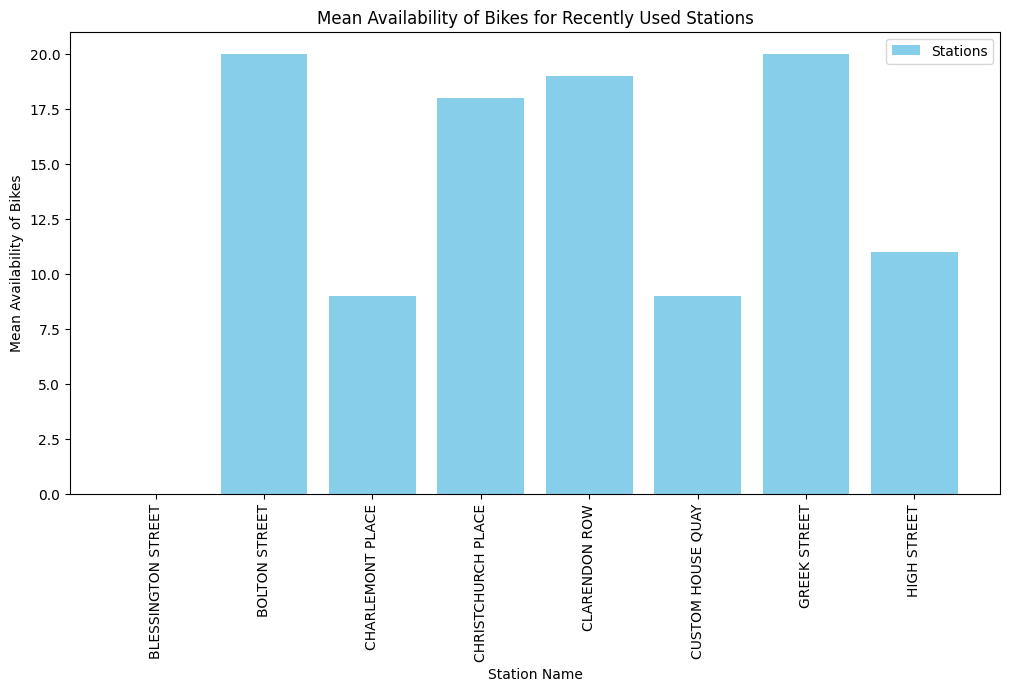

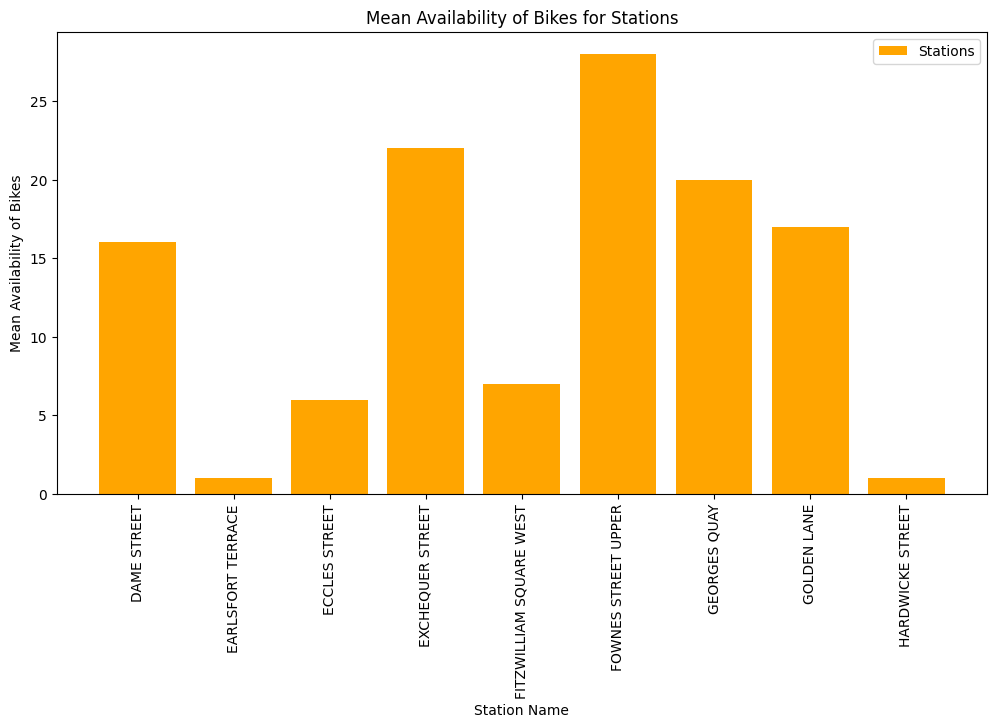

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/sanatparanjape/Desktop/UC_4/dublinbikes_1000_entries.csv'
data = pd.read_csv(file_path)

first_8_stations = data[data['station_id'].isin(range(1, 9))]  
remaining_9_stations = data[data['station_id'].isin(range(9, 18))]  
availability_stats_8 = first_8_stations.groupby('name')['available_bikes'].agg(['mean', 'median', 'std']).reset_index()
availability_stats_9 = remaining_9_stations.groupby('name')['available_bikes'].agg(['mean', 'median', 'std']).reset_index()

plt.figure(figsize=(12, 6))

plt.bar(availability_stats_8['name'], availability_stats_8['mean'], color='skyblue', label='Stations')
plt.xlabel('Station Name')
plt.ylabel('Mean Availability of Bikes')
plt.title('Mean Availability of Bikes for Recently Used Stations')
plt.xticks(rotation=90)
plt.legend()
#plt.savefig('static/figures/1.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(availability_stats_9['name'], availability_stats_9['mean'], color='orange', label='Stations')
plt.xlabel('Station Name')
plt.ylabel('Mean Availability of Bikes')
plt.title('Mean Availability of Bikes for Stations')
plt.xticks(rotation=90)
plt.legend()
#plt.savefig('figures/2.png', bbox_inches='tight')
plt.show()



In [4]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


train, test = train_test_split(data['available_bikes'], test_size=0.2, shuffle=False)

model = ARIMA(train, order=(5,1,0))  
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 156.50821562281354


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


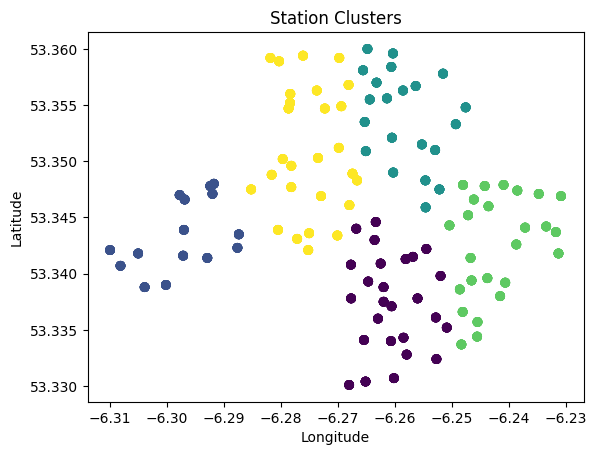

   cluster                                           stations
0        0  MERRION SQUARE WEST, CLONMEL STREET, ST. STEPH...
1        1  HEUSTON BRIDGE (SOUTH), KILMAINHAM GAOL, ROTHE...
2        2  PARNELL STREET, ECCLES STREET EAST, CUSTOM HOU...
3        3  BENSON STREET, HANOVER QUAY EAST, HANOVER QUAY...
4        4  GREEK STREET, BOLTON STREET, KING STREET NORTH...
cluster
0    13.807692
1    12.933333
2    13.761905
3    13.200000
4     8.111111
Name: available_bikes, dtype: float64


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Perform K-means clustering on station coordinates
coordinates = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
data['cluster'] = kmeans.fit_predict(coordinates)

avg_availability = data.groupby('cluster')['available_bikes'].mean()

plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.title('Station Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig('figures/3.png')
plt.show()

clustered_stations = {}
for cluster_id, cluster_data in data.groupby('cluster'):
    cluster_stations = set(cluster_data['name'])
    clustered_stations[cluster_id] = ', '.join(cluster_stations)

clustered_stations_df = pd.DataFrame(list(clustered_stations.items()), columns=['cluster', 'stations'])

print(clustered_stations_df)
print(avg_availability)
